<p style="background-color:#65FB9F;color:black;font-size:25px;text-align:center;border-radius:10px 10px;font-weight:bold;border: 3px solid green;">Tabular Playground Series - Dec 2021 🌄🧭</p>

<center><img src="https://github.com/Isharaneranjana/kaggle_gif/blob/main/Forest%20cover%20type%20prediction%20(1).gif?raw=True"></center>

##  <p style="background-color:#86FDB4;color:black;font-size:20px;text-align:center;border-radius:10px 10px;"> 🌄  Introduction </p>

<font size="4">The data is synthetically generated by a GAN that was trained on a the data from the Forest Cover Type Prediction. This dataset is much larger and may or may not have the same relationship to the target as the original data.The original study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:</font>

* 1 - Spruce/Fir
* 2 - Lodgepole Pine
* 3 - Ponderosa Pine
* 4 - Cottonwood/Willow
* 5 - Aspen
* 6 - Douglas-fir
* 7 - Krummholz



## <p style="background-color:#86FDB4;color:black;font-size:20px;text-align:center;border-radius:10px 10px;border: 3px solid green;">🔏Description of the dataset </p>

<font size="4">This dataset contains 56 variables and 4000000  observations about different cover types.</font>
<font size="4">Here's a brief version of the data description file.</font>
    
* Elevation - Elevation in meters
* Aspect - Aspect in degrees azimuth
* Slope - Slope in degrees
* Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
* Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
* Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
* Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
* Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
* Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
* Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
* Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
* Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
* Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation
    

In [ ]:
#importing librariaes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<center><img src="https://media.giphy.com/media/4FQMuOKR6zQRO/giphy.gif"></center>

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv('/kaggle/input/tabular-playground-series-dec-2021/train.csv')
test = pd.read_csv('/kaggle/input/tabular-playground-series-dec-2021/test.csv')

print(train.shape)
print(test.shape)

In [ ]:
train.dtypes

In [ ]:
train1=train.drop(['Id'],1)
test1=test.drop(['Id'],1)

In [ ]:
import gc
del train,test
gc.collect()

In [ ]:
from collections import Counter
print(sorted(Counter(train1['Cover_Type']).items()))
sns.countplot(train1['Cover_Type'],palette='Greens')

#### only one observation for type 5. hence I will remove it.

In [ ]:
train1= train1[train1.Cover_Type != 5]

#### <u> Numerical features</u>

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(20,15))
sns.histplot(ax=axes[0,0],data=train1, x="Slope",kde=True,hue="Cover_Type",palette="YlGn")
sns.histplot(ax=axes[0,1],data=train1, x="Elevation",kde=True,hue="Cover_Type",palette="YlGn")
sns.histplot(ax=axes[0,2],data=train1, x="Aspect",kde=True,hue="Cover_Type",palette="YlGn")
sns.histplot(ax=axes[1,0],data=train1, x="Horizontal_Distance_To_Hydrology",kde=True,hue="Cover_Type",palette="YlGn")
sns.histplot(ax=axes[1,1],data=train1, x="Vertical_Distance_To_Hydrology",kde=True,hue="Cover_Type",palette="YlGn")
sns.histplot(ax=axes[1,2],data=train1, x="Horizontal_Distance_To_Roadways",kde=True,hue="Cover_Type",palette="YlGn")
sns.histplot(ax=axes[2,0],data=train1, x="Hillshade_9am",kde=True,hue="Cover_Type",palette="YlGn")
sns.histplot(ax=axes[2,1],data=train1, x="Hillshade_Noon",kde=True,hue="Cover_Type",palette="YlGn")
sns.histplot(ax=axes[2,2],data=train1, x="Hillshade_3pm",kde=True,hue="Cover_Type",palette="YlGn")
sns.histplot(ax=axes[3,0],data=train1, x="Horizontal_Distance_To_Fire_Points",kde=True,hue="Cover_Type",palette="YlGn")

#### <u> Categorical features</u>

In [ ]:
fig, axes = plt.subplots(15, 3, figsize=(15, 60))
sns.countplot(ax=axes[0,0], data=train1, x='Wilderness_Area1',palette='YlGn')
sns.countplot(ax=axes[0,1], data=train1, x='Wilderness_Area2',palette='YlGn')
sns.countplot(ax=axes[0,2], data=train1, x='Wilderness_Area3',palette='YlGn')
sns.countplot(ax=axes[1,0], data=train1, x='Wilderness_Area4',palette='YlGn')
sns.countplot(ax=axes[1,1], data=train1, x='Soil_Type1',palette='YlGn')
sns.countplot(ax=axes[1,2], data=train1, x='Soil_Type2',palette='YlGn')
sns.countplot(ax=axes[2,0], data=train1, x='Soil_Type3',palette='YlGn')
sns.countplot(ax=axes[2,1], data=train1, x='Soil_Type4',palette='YlGn')
sns.countplot(ax=axes[2,2], data=train1, x='Soil_Type5',palette='YlGn')
sns.countplot(ax=axes[3,0], data=train1, x='Soil_Type6',palette='YlGn')
sns.countplot(ax=axes[3,1], data=train1, x='Soil_Type7',palette='YlGn')
sns.countplot(ax=axes[3,2], data=train1, x='Soil_Type8',palette='YlGn')
sns.countplot(ax=axes[4,0], data=train1, x='Soil_Type9',palette='YlGn')
sns.countplot(ax=axes[4,1], data=train1, x='Soil_Type10',palette='YlGn')
sns.countplot(ax=axes[4,2], data=train1, x='Soil_Type11',palette='YlGn')
sns.countplot(ax=axes[5,0], data=train1, x='Soil_Type12',palette='YlGn')
sns.countplot(ax=axes[5,1], data=train1, x='Soil_Type13',palette='YlGn')
sns.countplot(ax=axes[5,2], data=train1, x='Soil_Type14',palette='YlGn')
sns.countplot(ax=axes[6,0], data=train1, x='Soil_Type15',palette='YlGn')
sns.countplot(ax=axes[6,1], data=train1, x='Soil_Type16',palette='YlGn')
sns.countplot(ax=axes[6,2], data=train1, x='Soil_Type17',palette='YlGn')
sns.countplot(ax=axes[7,0], data=train1, x='Soil_Type18',palette='YlGn')
sns.countplot(ax=axes[7,1], data=train1, x='Soil_Type19',palette='YlGn')
sns.countplot(ax=axes[7,2], data=train1, x='Soil_Type20',palette='YlGn')
sns.countplot(ax=axes[8,0], data=train1, x='Soil_Type21',palette='YlGn')
sns.countplot(ax=axes[8,1], data=train1, x='Soil_Type22',palette='YlGn')
sns.countplot(ax=axes[8,2], data=train1, x='Soil_Type23',palette='YlGn')
sns.countplot(ax=axes[9,0], data=train1, x='Soil_Type24',palette='YlGn')
sns.countplot(ax=axes[9,1], data=train1, x='Soil_Type25',palette='YlGn')
sns.countplot(ax=axes[9,2], data=train1, x='Soil_Type26',palette='YlGn')
sns.countplot(ax=axes[10,0], data=train1, x='Soil_Type27',palette='YlGn')
sns.countplot(ax=axes[10,1], data=train1, x='Soil_Type28',palette='YlGn')
sns.countplot(ax=axes[10,2], data=train1, x='Soil_Type29',palette='YlGn')
sns.countplot(ax=axes[11,0], data=train1, x='Soil_Type30',palette='YlGn')
sns.countplot(ax=axes[11,1], data=train1, x='Soil_Type31',palette='YlGn')
sns.countplot(ax=axes[11,2], data=train1, x='Soil_Type32',palette='YlGn')
sns.countplot(ax=axes[12,0], data=train1, x='Soil_Type33',palette='YlGn')
sns.countplot(ax=axes[12,1], data=train1, x='Soil_Type34',palette='YlGn')
sns.countplot(ax=axes[12,2], data=train1, x='Soil_Type35',palette='YlGn')
sns.countplot(ax=axes[13,0], data=train1, x='Soil_Type36',palette='YlGn')
sns.countplot(ax=axes[13,1], data=train1, x='Soil_Type37',palette='YlGn')
sns.countplot(ax=axes[13,2], data=train1, x='Soil_Type38',palette='YlGn')
sns.countplot(ax=axes[14,0], data=train1, x='Soil_Type39',palette='YlGn')
sns.countplot(ax=axes[14,1], data=train1, x='Soil_Type40',palette='YlGn')

In [ ]:
train1.isnull().sum()

#### There are no missing values in all the variables. 

In [ ]:
train_x=train1.drop(['Soil_Type7','Soil_Type15'],1)
test_x=test1.drop(['Soil_Type7','Soil_Type15'],1)
del test1,train1
gc.collect()


In [ ]:
train_x.describe()

In [ ]:
train_x["Aspect"][train_x["Aspect"] < 0] += 360
train_x["Aspect"][train_x["Aspect"] > 359] -= 360

test_x["Aspect"][test_x["Aspect"] < 0] += 360
test_x["Aspect"][test_x["Aspect"] > 359] -= 360

In [ ]:
train_x.loc[train_x["Hillshade_9am"] < 0, "Hillshade_9am"] = 0
test_x.loc[test_x["Hillshade_9am"] < 0, "Hillshade_9am"] = 0

train_x.loc[train_x["Hillshade_Noon"] < 0, "Hillshade_Noon"] = 0
test_x.loc[test_x["Hillshade_Noon"] < 0, "Hillshade_Noon"] = 0

train_x.loc[train_x["Hillshade_3pm"] < 0, "Hillshade_3pm"] = 0
test_x.loc[test_x["Hillshade_3pm"] < 0, "Hillshade_3pm"] = 0

train_x.loc[train_x["Hillshade_9am"] > 255, "Hillshade_9am"] = 255
test_x.loc[test_x["Hillshade_9am"] > 255, "Hillshade_9am"] = 255

train_x.loc[train_x["Hillshade_Noon"] > 255, "Hillshade_Noon"] = 255
test_x.loc[test_x["Hillshade_Noon"] > 255, "Hillshade_Noon"] = 255

train_x.loc[train_x["Hillshade_3pm"] > 255, "Hillshade_3pm"] = 255
test_x.loc[test_x["Hillshade_3pm"] > 255, "Hillshade_3pm"] = 255

In [ ]:
'''cols= ['Elevation','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Aspect',
       'Hillshade_Noon','Hillshade_3pm','Hillshade_9am','Slope','Wilderness_Area4','Wilderness_Area3','Soil_Type25','Wilderness_Area1','Soil_Type13','Soil_Type23','Soil_Type12','Soil_Type38']'''

In [ ]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2

    for col in df.columns:
        col_type = df[col].dtypes

        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2

    if verbose:
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
 
    return df

In [ ]:
train_x = reduce_mem_usage(train_x)
test_x = reduce_mem_usage(test_x)

In [ ]:
'''train_x=train_x.filter(items=cols)
test_x=test_x.filter(items=cols)'''

In [ ]:
print(train_x.shape)
print(test_x.shape)

In [ ]:
def outlier_function(df, col_name):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [ ]:
n_features=['Elevation','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Aspect',
       'Hillshade_Noon','Hillshade_3pm','Hillshade_9am','Slope']
# loop through all columns to see if there are any outliers
for column in n_features:
    if outlier_function(train_x, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(train_x, column)[2], column))

In [ ]:
y=train_x['Cover_Type']
train_x=train_x.drop(['Cover_Type'],1)

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y)
y=le.transform(y)

#### <u> scaling data </u>

In [ ]:
'''from sklearn.preprocessing import MinMaxScaler

x= pd.concat([train_x,test_x],axis=0)
trans = MinMaxScaler()
trans.fit(x)
X= trans.transform(train_x)
test_x = trans.transform(test_x)
data= pd.DataFrame(X, columns=train_x.columns)'''

In [ ]:
'''from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
train_x[n_features] = scaler.fit_transform(train_x[n_features])
test_x[n_features] = scaler.fit_transform(test_x[n_features])
data= pd.DataFrame(train_x, columns=train_x.columns)'''

In [ ]:
'''fig, axes = plt.subplots(4, 3, figsize=(20,15))
sns.histplot(ax=axes[0,0],data=data, x="Slope",kde=True,color="#71C074")
sns.histplot(ax=axes[0,1],data=data, x="Elevation",kde=True,color="#71C074")
sns.histplot(ax=axes[0,2],data=data, x="Aspect",kde=True,color="#71C074")
sns.histplot(ax=axes[1,0],data=data, x="Horizontal_Distance_To_Hydrology",kde=True,color="#71C074")
sns.histplot(ax=axes[1,1],data=data, x="Vertical_Distance_To_Hydrology",kde=True,color="#71C074")
sns.histplot(ax=axes[1,2],data=data, x="Horizontal_Distance_To_Roadways",kde=True,color="#71C074")
sns.histplot(ax=axes[2,0],data=data, x="Hillshade_9am",kde=True,color="#71C074")
sns.histplot(ax=axes[2,1],data=data, x="Hillshade_Noon",kde=True,color="#71C074")
sns.histplot(ax=axes[2,2],data=data, x="Hillshade_3pm",kde=True,color="#71C074")
sns.histplot(ax=axes[3,0],data=data, x="Horizontal_Distance_To_Fire_Points",kde=True,color="#71C074")'''

In [ ]:
'''del data
gc.collect()'''

In [ ]:
train_x.isna().sum()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_x, y, test_size=0.4, random_state=1234)
x_test1, x_val, y_test1, y_val = train_test_split(x_test, y_test, test_size=0.2, random_state=1234)

print("X train shape: ", x_train.shape)
print("X validation shape: ", x_val.shape)
print("X test shape: ", x_test.shape)
print("Y train shape: ", y_train.shape)
print("Y validation shape: ", y_val.shape)
print("Y test shape: ", y_test.shape)
del y
gc.collect()

In [ ]:
!pip install pytorch-tabnet

In [ ]:
'''y_train=y_train.values
y_test=y_test.values
y_test1=y_test1.values
y_val=y_val.values'''

x_train=x_train.values
x_test=x_test.values
x_test1=x_test1.values
x_val=x_val.values


In [ ]:
test_x=test_x.values

### TabNet ..

#### <u>Overview</u>

*  <b> TabNet inputs raw tabular data without any preprocessing and is trained using gradient descent-based optimisation.</b>
* <b> TabNet uses sequential attention to choose features at each decision step, enabling interpretability and   better learning as the learning capacity is used for the most useful features.</b>
*  <b>Feature selection is instance-wise, e.g. it can be different for each row of the training dataset.</b>
*  <b>TabNet employs a single deep learning architecture for feature selection and reasoning, this is known as soft         feature selection.</b>
* <b> Above design choices allows TabNet to enable two kinds of interpretability: local interpretability that   visualises the importance of features and how they are combined for a single row, and global interpretability which      quantifies the contribution of each feature to the trained model across the dataset.</b>

#### <u>Architecture</u>

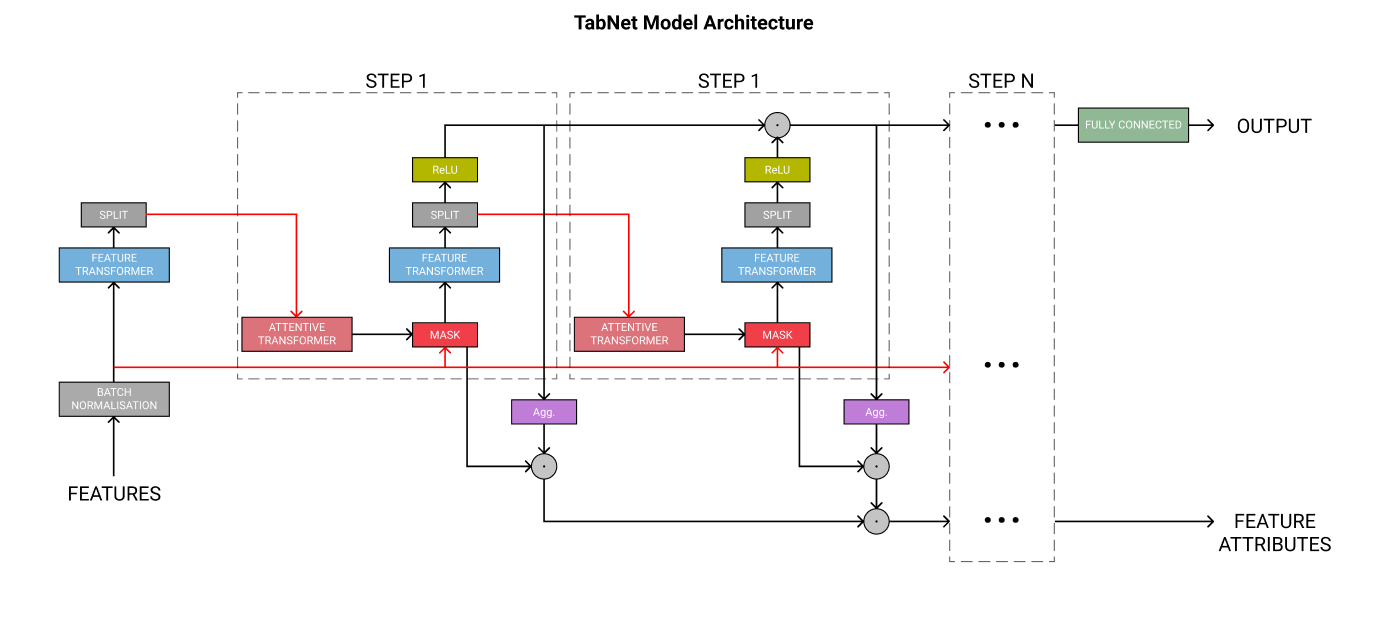

#### <u>Useful Sources</u>

*  <b>Original paper : https://arxiv.org/abs/1908.07442 </b>
*  <b> TabNet — Deep Neural Network for Structured, Tabular Data : https://towardsdatascience.com/tabnet-deep-neural-network-for-structured-tabular-data-39eb4b27a9e4</b>
*  <b> TabNet: The End of Gradient Boosting?: https://towardsdatascience.com/tabnet-e1b979907694</b>


In [ ]:
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.metrics import roc_auc_score, accuracy_score

#### TabNet with default parameters.

In [ ]:
'''clf1 = TabNetClassifier() 
clf1.fit(
  x_train, y_train,
  eval_set=[(x_val, y_val)],
  eval_name=['valid'],
  eval_metric=['accuracy'],
  max_epochs=50 , patience=15
)'''


In [ ]:
# define the model
clf2 = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":4, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax' # "sparsemax"
                      )

# fit the model 
clf2.fit(
    x_train,y_train,
    eval_set=[(x_train, y_train), (x_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy'],
    max_epochs=160 , patience=25
)            

In [ ]:
# determine best accuracy for test set
preds = clf2.predict(x_test1)
test_acc = accuracy_score(preds, y_test1)

# determine best accuracy for validation set
preds_valid = clf2.predict(x_val)
valid_acc = accuracy_score(preds_valid, y_val)

print("Accuracy score on validation set:", valid_acc)
print("Accuracy score on test set: ",test_acc)


In [ ]:
# plot losses
plt.plot(clf2.history['loss'])

In [ ]:
# plot accuracy
plt.plot(clf2.history['valid_accuracy'])

In [ ]:
# find and plot feature importance
y_pred = clf2.predict(x_test1)
clf2.feature_importances_
feat_importances = pd.Series(clf2.feature_importances_, index=train_x.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
from sklearn.metrics import classification_report
preds = clf2.predict(x_test1)
print(classification_report(preds,y_test1))

In [ ]:
#test_x=test_x.values
preds = clf2.predict(test_x)
preds

In [ ]:
newpred=le.inverse_transform(preds)

In [ ]:
newpred

## <p style="background-color:#86FDB4;color:black;font-size:20px;text-align:center;border-radius:10px 10px;border: 3px solid green;"> ⛺ semi supervised TabNet </p>

#### TabNet can also be pretrained as an unsupervised model. Pretraining involves deliberately masking certain cells and learning relationships between these cells and adjacent columns by predicting the masked values. The weights learned can then be saved and used for a supervised task.

In [ ]:
from pytorch_tabnet.pretraining import TabNetPretrainer
# TabNetPretrainer
unsupervised_model = TabNetPretrainer(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax' # "sparsemax"
)

unsupervised_model.fit(
    X_train=x_train,
    eval_set=[x_val],
    pretraining_ratio=0.8,
    max_epochs=20 , patience=4,
)

clf = TabNetClassifier(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=3e-2),
    scheduler_params={"step_size":10, # how to use learning rate scheduler
                      "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='sparsemax' # This will be overwritten if using pretrain model
)

clf.fit(
    X_train=x_train, y_train=y_train,
    eval_set=[(x_train, y_train), (x_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy'],
    max_epochs=20 , patience=5,
    from_unsupervised=unsupervised_model
)



In [ ]:
predst = clf.predict(x_test1)
test_acc = accuracy_score(predst, y_test1)


preds_valid = clf.predict(x_val)
valid_acc = accuracy_score(preds_valid, y_val)

print("Accuracy score on validation set:", valid_acc)
print("Accuracy score on test set: ",test_acc)

In [ ]:
feat_importances = pd.Series(clf.feature_importances_, index=train_x.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
# plot losses
plt.plot(clf.history['loss'])

In [ ]:
# plot accuracy
plt.plot(clf.history['valid_accuracy'])

In [ ]:
preds1 = clf.predict(test_x)
preds1

## <p style="background-color:#86FDB4;color:black;font-size:20px;text-align:center;border-radius:10px 10px;border: 3px solid green;"> 🌍 Submission </p>

In [ ]:
df_submission = pd.read_csv('/kaggle/input/tabular-playground-series-dec-2021/sample_submission.csv')
df_submission['Cover_Type']=newpred
df_submission.to_csv('submission.csv',index=False)

In [ ]:
df_submission.head()

<center><font size="4" color="black"><b>Highly appreciate your questions or feedback related to this notebook. THANK YOU <span style='font-size:22px;'>&#128522;</span></b> </font></center>

<center><img src="https://media.giphy.com/media/j1Xyt3DHfJcmk/giphy.gif" style="width:400px;height:280px;"></center>